**Possible Ideas**

Predicting which console is the most popular, to allow for a better allocation of budget. We can specify it by targetting certain countries. 

Developing a game on a genre that fits a country the most. For the US, people love to play games that give them the dopamine feeling, etc.

Attempting to predict the health of the video game market

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso

To start it off, we will be predicting which console performs the best in various countries based on the sales from each country.

Initializing the dataframe.

In [2]:
df = pd.read_csv("vgsales.csv")

In [3]:
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


Checking for how many unique values, and later we'll be selecting which one to use. 

In [4]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**USING SVM TO CLASSIFY TYPES OF PLATFORM BASED ON SALES AND YEAR**

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import svm

from mlxtend.plotting import plot_decision_regions

import numpy.polynomial.polynomial as poly

In [6]:
selected_df = df[df["Platform"].isin(["Wii","XOne","PC","PS4"])]

Changing words to numbers.

0 = Wii

1 = Xone

2 = PC

3 = PS4

In [7]:
dic = {"Wii":0,"XOne":1,"PC":2,"PS4":3}

selected_df["Platform"] = selected_df["Platform"].apply(lambda x: dic[x])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Results of the Change

In [8]:
selected_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,0,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,0,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,0,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,0,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,0,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


AFter changing, there are apparently NaN values left in the DF, thus we are removing it. 

In [9]:
selected_df = selected_df.dropna()
selected_df.dropna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,0,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,0,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,0,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,0,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,0,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...,...
16576,16579,Rugby Challenge 3,1,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16577,16580,Damnation,2,2009.0,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16581,16584,Fit & Fun,0,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01
16585,16588,Breach,2,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01


Removing all the unnncessary columns, so we can have the ones that we need. 

In [10]:
new_x = selected_df.drop(columns = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Rank","Name","Genre","Publisher","Platform"]) #Using

In [11]:
x = new_x
x = x.dropna()
y = selected_df["Platform"]
y = y.dropna()

print(x.shape,y.shape)

(2777, 2) (2777,)


Splitting the data into train and test. 

In [12]:
#x_train,x_test,y_train,y_test = train_test_split(x,y)

#print(x_train.shape,y_train.shape)

#svm_model = svm.SVC(kernel = "linear")
#svm_model.fit(x_train,y_train)

All around function, just input your x,y, and the type of kernel. 

In [13]:
def svm_fitting(type,x,y,c):
  x_train,x_test,y_train,y_test = train_test_split(x,y)

  svm_model = svm.SVC(probability = False,kernel = type,C = c)
  svm_model.fit(x_train,y_train)

  plot_decision_regions(np.array(x_train),np.array(y_train),clf=svm_model)
  plt.xlabel("Year")
  plt.ylabel("Sales in Millions")
  plt.show(block=False)

  yhat_train = svm_model.predict(x_train)
  acc_train = np.mean(yhat_train == y_train)
  print("Accuracy on training data = %f" % acc_train)

  yhat_test = svm_model.predict(x_test)
  acc_test = np.mean(yhat_test == y_test)
  print("Accuracy on test data = %f" % acc_test)


Linear

In [14]:
nums = [.001,.01,.1,1,10]

The current legend of the diagram below

0 = Wii

1 = Xone 

2 = PC 

3 = PS4

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


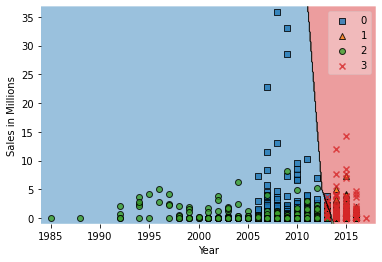

Accuracy on training data = 0.566763
Accuracy on test data = 0.608633


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


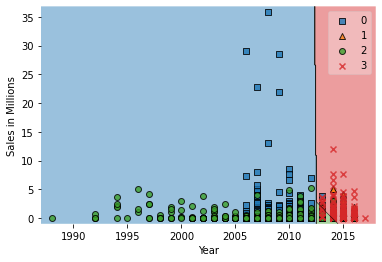

Accuracy on training data = 0.583093
Accuracy on test data = 0.601439


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


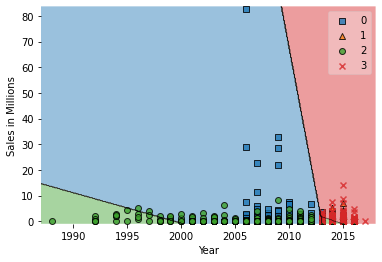

Accuracy on training data = 0.595101
Accuracy on test data = 0.600000


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


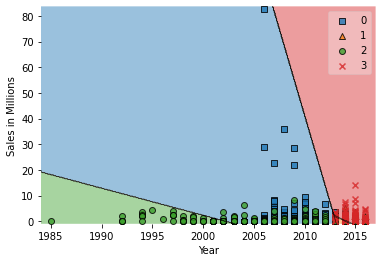

Accuracy on training data = 0.602305
Accuracy on test data = 0.618705


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


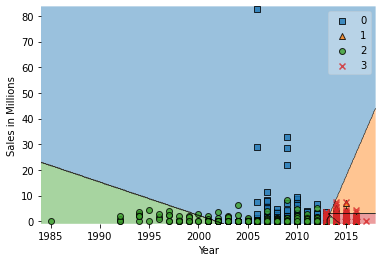

Accuracy on training data = 0.590298
Accuracy on test data = 0.600000


<Figure size 432x288 with 0 Axes>

In [15]:
for c in nums:
  svm_fitting("linear",x,y,c)
  plt.clf()

Radial Basis Function Kernel

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


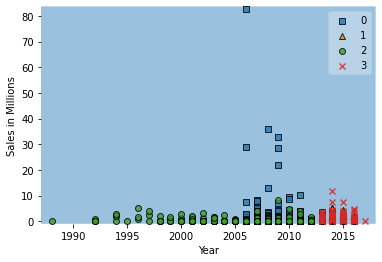

Accuracy on training data = 0.462536
Accuracy on test data = 0.470504


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


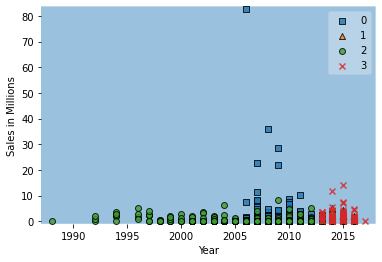

Accuracy on training data = 0.468300
Accuracy on test data = 0.453237


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


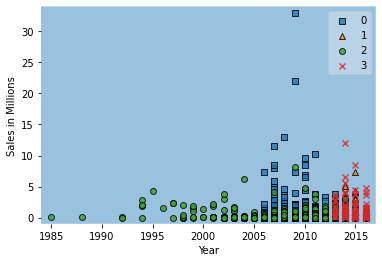

Accuracy on training data = 0.471662
Accuracy on test data = 0.443165


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


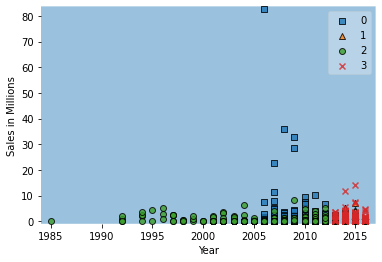

Accuracy on training data = 0.469260
Accuracy on test data = 0.450360


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


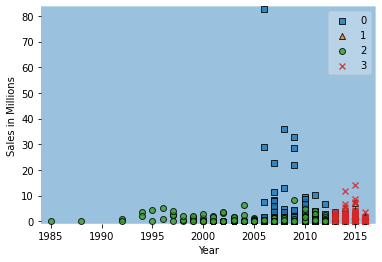

Accuracy on training data = 0.463497
Accuracy on test data = 0.467626


In [17]:
for c in nums:
  svm_fitting("rbf",x,y,c)

Polynomial 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


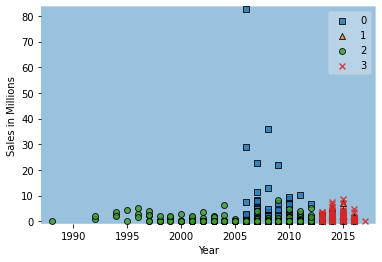

Accuracy on training data = 0.469260
Accuracy on test data = 0.450360


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


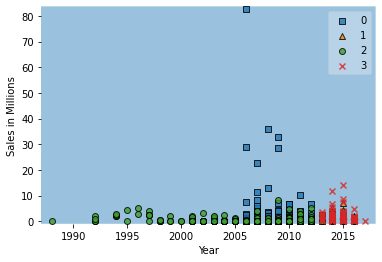

Accuracy on training data = 0.461575
Accuracy on test data = 0.473381


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


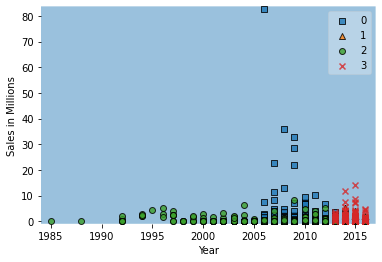

Accuracy on training data = 0.468780
Accuracy on test data = 0.451799


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


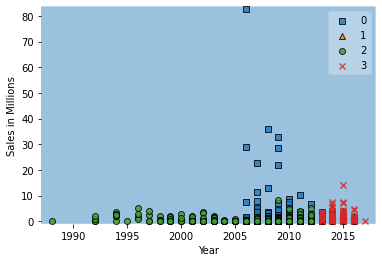

Accuracy on training data = 0.468300
Accuracy on test data = 0.453237


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


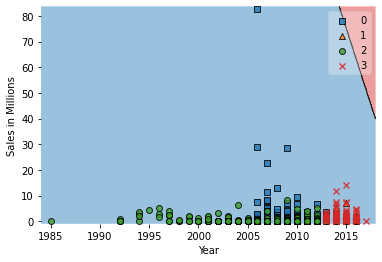

Accuracy on training data = 0.464938
Accuracy on test data = 0.463309


In [19]:
for c in nums:
  svm_fitting("poly",x,y,c)

The accuracy of the SVM. 